### Motivation:
-The dataset has names of individuals who were killed, date, mental threat level, weapons, age, gender race. This project is focused on exploring the rates of fatal shootings in the United states, and comparing across states. In this project, I will explore poverty rate, median income and highschool graduation rate and compare these across states to also see if shooting rates has a correlation with any of the aforementioned factor.  
-I chose this dataset because there have been reports in the news about wrongful killings and I thought it would be interesting to explore the data available and determine the actual number of individuals affected and circumstances that may place them more at risk for being targeted.  

### Question 1: What is the ratio of male to female victims of fatal shootings overall, did the female victims pose a threat?
- What states have the highest number of female victims?
- What percentage of those female victims were fleeing?
- What made the victims a threat? Were they armed? Were there signs of mental illness?

### Question 2: Percentage of fatal shootings grouped by Race among states with highest fatal shooting rates
- What states have the highest numbers of fatal shootings overall?
- What cities have the highest number of fatal shooting victims? 
- Among the states with the highest number of victims what is most carried weapon?


### Question 3: What was the cause of death for the victims of fatal shootings?
- Are victims older or younger individuals?
- What is the distribution of age groups by month and year?


### Question 4: What is the distribution of race per state?
- What is the relationship between median income and poverty level?
- Is the relationship between poverty level and highschool graduation rate for individuals over 25?



### Dataset/Data cleaning
- My dataset was gotten from kaggle: https://www.kaggle.com/kwullum/fatal-police-shootings-in-the-us/kernels
- This dataset has five csv files. (1) fatal shootings from 2015-2017 (2) Median income per state (3) Highschool graduation rate for indivudal over 25 per state (4) Distribution of race per state (5) Individuals living below the poverty level per state. I found that the csv had a diffenrt encoding from utf8 using "chardet" The csv files had a "Windows-1252" encoding, so I converted them "utf8" encoding to read the csv file
- I dropped the NaN values as there weren't that many and and wouldn't have considerably skewed my data. 
- I dealt with special characters in the dataset by replacing them with zeros. 



In [417]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
from scipy.stats import norm
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
# import statsmo
import sys
from collections import Counter
%matplotlib inline
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
import chardet

# py.offline.init_notebook_mode()


In [418]:
with open('data/PoliceKillingsUS.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
with open('data/PercentagePeopleBelowPovertyLevel.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [419]:
fatal_15 = pd.read_csv("data/PoliceKillingsUS.csv", encoding='Windows-1252')
poverty_level  = pd.read_csv("data/PercentagePeopleBelowPovertyLevel.csv", encoding='Windows-1252') 
highschool_25_csv = pd.read_csv("data/PercentOver25CompletedHighSchool.csv", encoding='Windows-1252')
household_income = pd.read_csv("data/MedianHouseholdIncome2015.csv", encoding='Windows-1252')
city = pd.read_csv("data/ShareRaceByCity.csv", encoding='Windows-1252')

In [420]:
# fatal_15

In [421]:
fatal_15.to_csv("PoliceKillingsUS-utf8.csv")
poverty_level.to_csv("PercentagePeopleBelowPovertyLevel-utf8.csv")
highschool_25_csv.to_csv("PercentOver25CompletedHighSchool-utf8.csv")
household_income.to_csv("MedianHouseholdIncome2015-utf8.csv")
city.to_csv("ShareRaceByCity-utf8.csv")


In [422]:
fs_csv = pd.read_csv("PoliceKillingsUS-utf8.csv")
poverty_csv = pd.read_csv("PercentagePeopleBelowPovertyLevel-utf8.csv")
highschool_25_csv = pd.read_csv("PercentOver25CompletedHighSchool-utf8.csv")
income_csv = pd.read_csv("MedianHouseholdIncome2015-utf8.csv")
city_csv = pd.read_csv("ShareRaceByCity-utf8.csv")


In [423]:
income_csv = pd.read_csv("MedianHouseholdIncome2015-utf8.csv")
fs_csv.head()
fs_csv.columns
fs_csv = fs_csv.drop('id', 1)
fs_csv = fs_csv.drop('Unnamed: 0', 1)
# fs_csv.drop('Unamed 0', axis=1, inplace=True)
# DROP COLUMNNNS 

In [424]:
income_csv.head()
poverty_csv.head()
city_csv.head()
highschool_25_csv.head()

,Unnamed: 0,Geographic Area,City,percent_completed_hs
0,0,AL,Abanda CDP,21.2
1,1,AL,Abbeville city,69.1
2,2,AL,Adamsville city,78.9
3,3,AL,Addison town,81.4
4,4,AL,Akron town,68.6


In [425]:
income_csv = income_csv.drop('Unnamed: 0', 1)
poverty_csv = poverty_csv.drop('Unnamed: 0', 1)
city_csv = city_csv.drop('Unnamed: 0', 1)
highschool_25_csv = highschool_25_csv.drop('Unnamed: 0', 1)

In [426]:
missing_values_count = fs_csv.isnull().sum()
missing_values_count


name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

## Descriptive statistics

In [427]:
fs_csv.describe()

,age
count,2458.000000
mean,36.605370
std,13.030774
min,6.000000
25%,26.000000
50%,34.000000
75%,45.000000
max,91.000000


In [428]:
highschool_25_csv.describe()

,Geographic Area,City,percent_completed_hs
count,29329,29329,29329
unique,51,24255,728
top,PA,Franklin city,100
freq,1762,16,1301


In [429]:
poverty_csv.describe()

,Geographic Area,City,poverty_rate
count,29329,29329,29329
unique,51,24255,771
top,PA,Franklin city,0
freq,1762,16,1464


The mean age of victims is 36, the youngest victim of a fatal shooting was 6 years old and the oldest victims was 91 years old. The mean percentage of individuals over 25 that completed highschool is 85%, and the highest was 100%. The mean poverty rate was 16%. 

### Question 1: What is the ratio of male to female victims of fatal shootings overall, did the female victims pose a threat?
- What states have the highest number of female victims?
- What percentage of those female victims were fleeing?
- What made the victims a threat? Were they armed? Were there signs of mental illness?


#### States with highest fatal shooting incident rates



In [430]:
female_victims.head()
female_states = female_victims["state"]
top_female_states = female_states.value_counts()
top_female_states.head()
female_df = top_female_states.rename_axis('state').reset_index(name='counts')
female_df
female_dict = female_df.set_index('state')['counts'].to_dict()
female_victims['female_victim_count'] = female_victims['state'].map(female_dict)

#what to do with count column 
##what states have the highest victims by state

In [431]:
female_victims = fs_csv[(fs_csv.gender == 'F')]
print(len(female_victims.name.unique()))
male_victims = fs_csv[(fs_csv.gender == 'M')]
print(len(male_victims.name.unique()))
ratio = len(male_victims.name)/len(female_victims.name)
print("The ratio of male to female " ,ratio)

106
2376
The ratio of male to female  22.69158878504673


##### Pie chart showing weapons for female victims that were seen as threats

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:3893: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



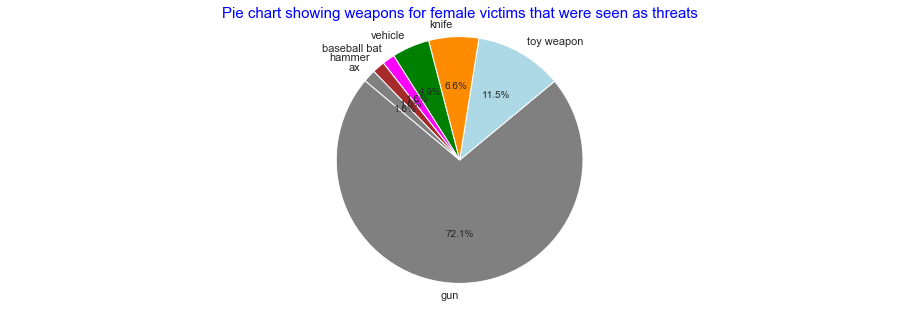

In [432]:
threat_weapon = female_victims[(female_victims['threat_level'] == 'attack')]
# df_filtered = df[(df['family_history'] == 'Yes') & (df['treatment'] == 'Yes')]
female_victims.armed.dropna(inplace = True)
# threat_weapon.armed.value_counts().values
labels = threat_weapon.armed.value_counts().index
colors = ['grey','blue','red','yellow','green','brown']
explode = [0,0,0,0.5,0,0] #--------------> change labelling 
sizes = threat_weapon.armed.value_counts().values



colors = ['grey', 'lightblue', 'darkorange', 'green','magenta', 'brown']
plt.figure(figsize = (16,5))
plt.pie(sizes,labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title('Pie chart showing weapons for female victims that were seen as threats' ,color = 'blue',fontsize = 15)


plt.show()

##### Pie chart showing weapons for female victims whose threat level was "undetermined"

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:3893: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



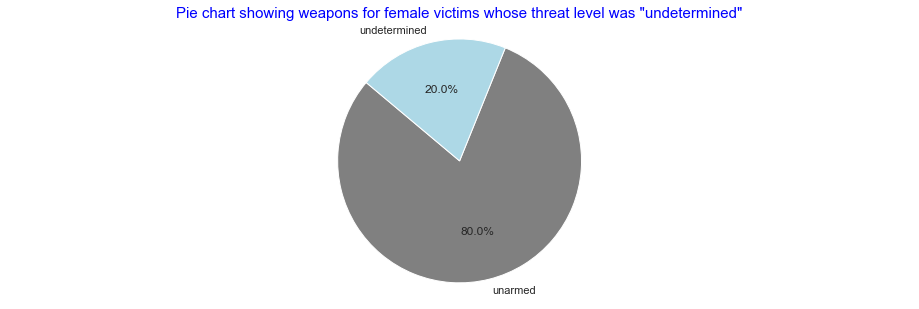

In [413]:
threat_weapon = female_victims[(female_victims['threat_level'] == 'undetermined')]
# df_filtered = df[(df['family_history'] == 'Yes') & (df['treatment'] == 'Yes')]
female_victims.armed.dropna(inplace = True)
# threat_weapon.armed.value_counts().values
labels = threat_weapon.armed.value_counts().index
colors = ['grey','blue','red','yellow','green','brown']
explode = [0,0,0,0.5,0,0] #--------------> change labelling 
sizes = threat_weapon.armed.value_counts().values



colors = ['grey', 'lightblue', 'darkorange', 'green','magenta', 'brown']
plt.figure(figsize = (16,5))
plt.pie(sizes,labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title('Pie chart showing weapons for female victims whose threat level was "undetermined"' ,color = 'blue',fontsize = 15)
plt.show()




### Question 2: Percentage of fatal shootings grouped by Race among states with highest fatal shooting rates
- What states have the highest numbers of fatal shootings overall?
- What cities have the highest number of fatal shooting victims? 
- Among the states with the highest number of victims what is most carried weapon?
- What was the cause of death for the victims of fatal shootings?



#### States with the highest number of victims overall

In [379]:
victims_state = fs_csv["state"]
top_states = victims_state.value_counts()
top_states.head()
states_df = top_states.rename_axis('state').reset_index(name='counts')
states_df = states_df.head()
states_df
highest_states = pd.DataFrame([])
for items in states_df["state"]:
    highest_states = highest_states.append(fs_csv[(fs_csv.state == items)])
groups = highest_states.state.value_counts().values
# victims_state
# highest_states


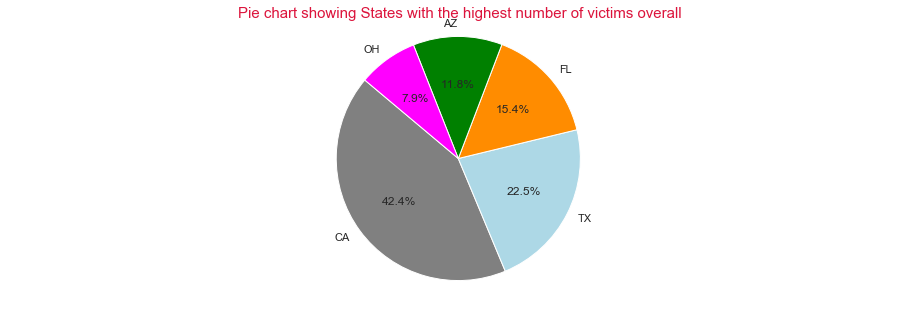

In [391]:
labels = 'CA','TX','FL', 'AZ', 'OH'
colors = ['grey', 'lightblue', 'darkorange', 'green','magenta']
plt.figure(figsize = (16,5))
plt.pie(groups, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title('Pie chart showing States with the highest number of victims overall' ,color = 'crimson',fontsize = 15)
plt.show()

### Percentage of fatal shootings grouped by Race among states with highest fatal shooting rates

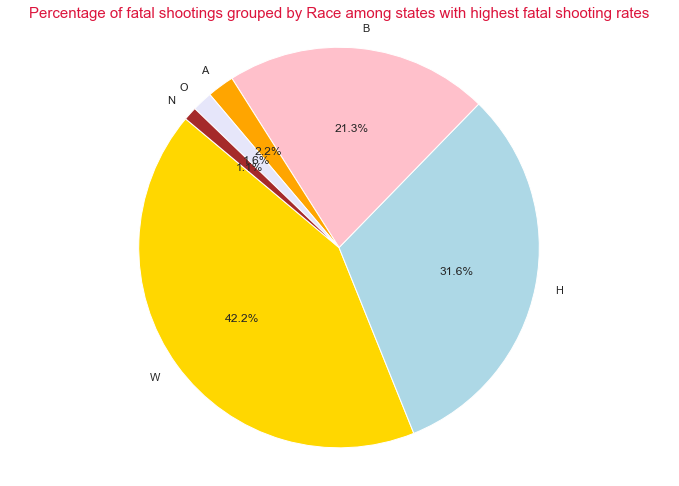

In [395]:
highest_states.race.dropna(inplace = True)
labels = highest_states.race.value_counts().index
# colors = ['grey','blue','red','yellow','green','brown']
explode = [0,0,0.05,0,0,0] 
sizes = highest_states.race.value_counts().values



colors = ['gold', 'lightblue', 'pink', 'orange','lavender', 'brown']
# plt.figure(figsize = (16,5))
plt.pie(sizes,labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title('Percentage of fatal shootings grouped by Race among states with highest fatal shooting rates' ,color = 'crimson',fontsize = 15)
plt.show()

Text(0.5,1,'Cities with the highest number of victims')

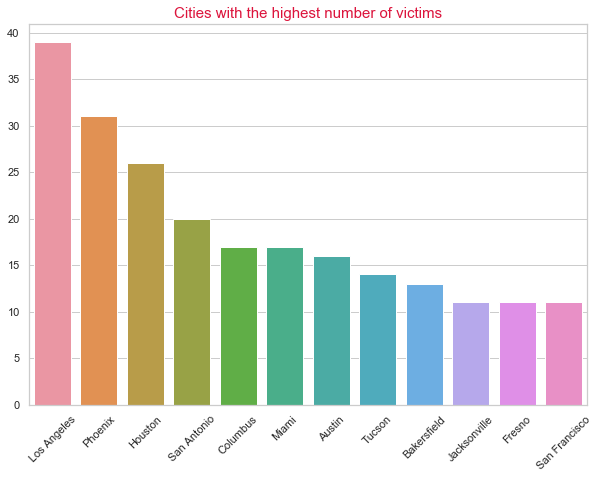

In [323]:
city = highest_states.city.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=city[:12].index,y=city[:12].values)
plt.xticks(rotation=45)
plt.title('Cities with the highest number of victims',color = 'crimson',fontsize=15)

### What weapons did the victims have on them

,Weapon,counts
0,gun,499
1,knife,173
2,unarmed,79
3,vehicle,70
4,undetermined,43


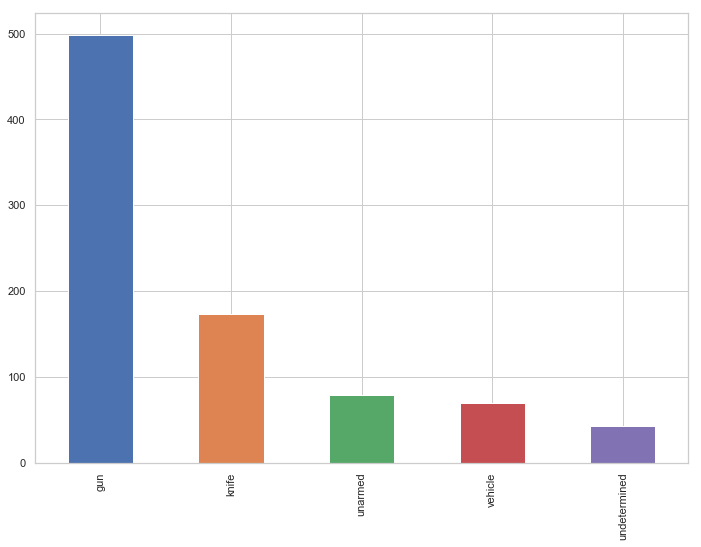

In [393]:
# plt.figure(figsize = (16,5))
armed = highest_states.armed.value_counts().head()
armed.plot.bar()
armed
armed_df = armed.rename_axis('Weapon').reset_index(name='counts')
armed_df = armed_df.head(10)
armed_df



In [369]:
threat_weapon2 = highest_states[(highest_states['armed'] == 'vehicle')]
threat_weapon2.armed.dropna(inplace = True)
threat_weapon2_values= threat_weapon2.flee.value_counts()
threat_weapon2_values

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:3893: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Car            51
Not fleeing    14
Other           2
Foot            1
Name: flee, dtype: int64

### Question 3: What was the cause of death for the victims of fatal shootings?
- Are victims older or younger individuals?
- What is the distribution of age groups by month and year?

#### Swarmplot showing cause of death by race in states with highest fatal shooting rates

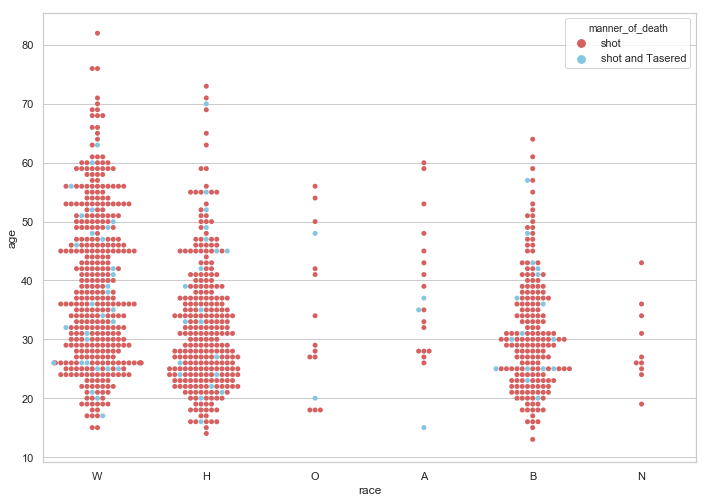

In [396]:
sns.set(style="whitegrid", palette="muted")
sns.swarmplot(x="race", y="age",hue="manner_of_death", palette=["r", "c"], data=highest_states)
plt.show()

#CHANGE THIS TO A RATIO/DO A RATION COMPARISON also compare with the normal csv 

,Age,counts
0,25.0,103
1,36.0,91
2,31.0,85
3,29.0,83
4,24.0,83


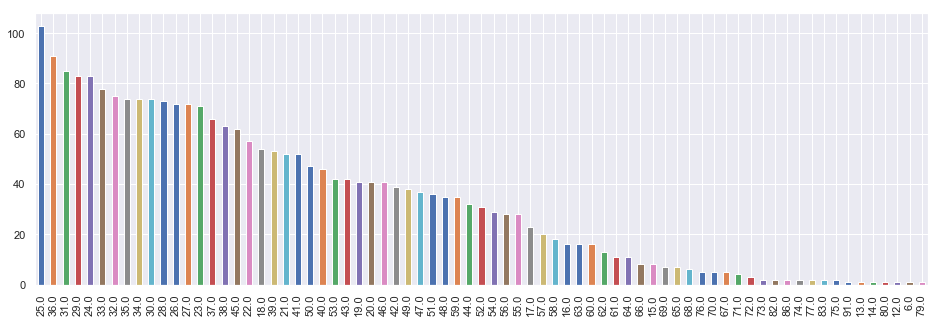

In [371]:
age_victims = fs_csv["age"].value_counts()
# age_values = age_victims.values()
age_victims.head(10)
plt.figure(figsize = (16,5))
age_victims.plot.bar()
age_victims = age_victims.rename_axis('Age').reset_index(name='counts')

age_victims.head()


In [257]:
date_csv = fs_csv.copy()


In [258]:

date_csv['year']= date_csv['date'].astype(str)
date_csv['year'] = date_csv['year'].str.split('/').str[2]
date_csv['year'] = "20" + date_csv['year'].astype(str)
date_csv['month'] = date_csv['date'].astype(str)
date_csv['month'] = date_csv['month'].str.split('/').str[1]

date_csv.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month
0,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,2015,01
1,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,2015,01
2,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,2015,01
3,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015,01
4,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,2015,01


In [259]:
month_dict = {"01":"January", "02":"February", "03":"March", "04":"April","05":"May","06":"June","07":"July","08":"August","09":"September","10":"October","11":"November","12":"December"}
date_csv['month'] = date_csv['month'].map(month_dict)
date_csv.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month
0,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,2015,January
1,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,2015,January
2,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,2015,January
3,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015,January
4,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,2015,January


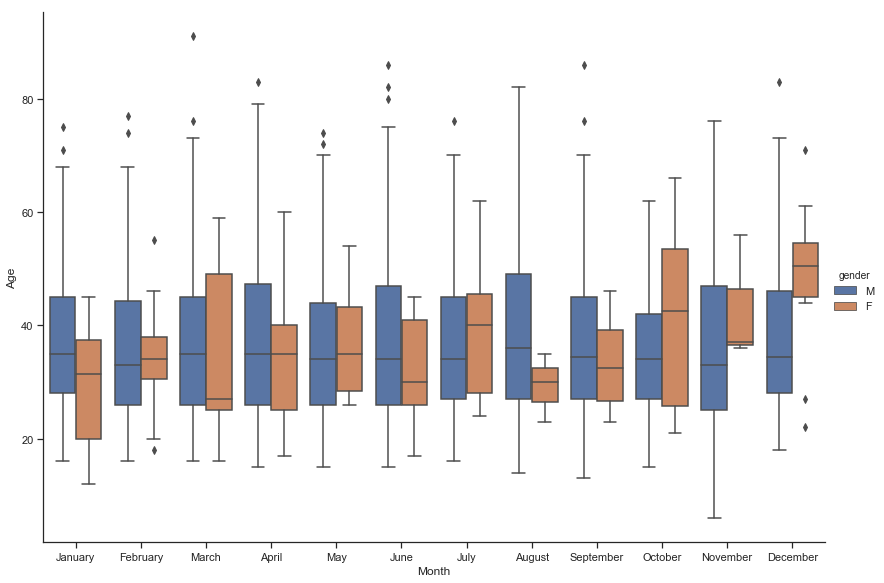

In [399]:
sns.set(rc={'figure.figsize':(9.7,7.17)})

with sns.axes_style(style='ticks'):
    g = sns.catplot("month", "age", "gender", data=date_csv, kind="box",height=8.27, aspect=11.7/8.27)
    g.set_axis_labels("Month", "Age");

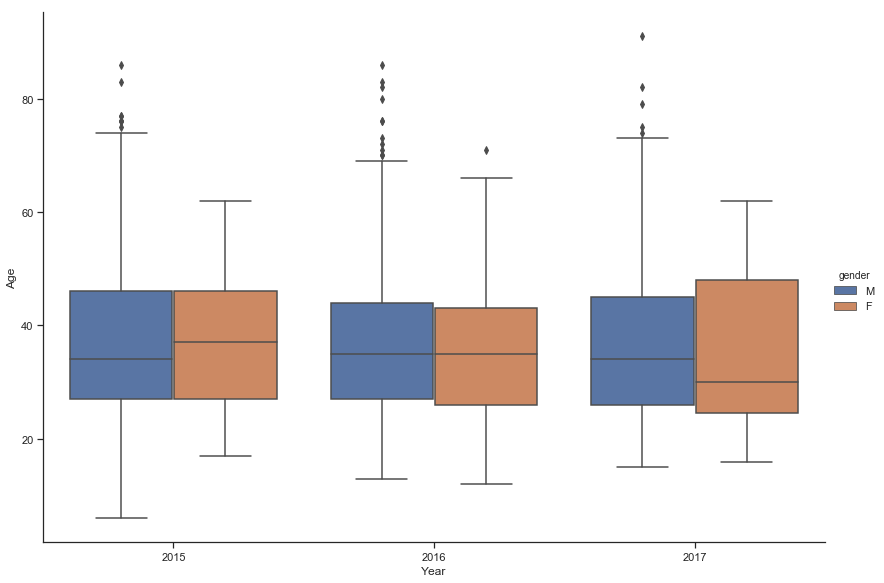

In [372]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

with sns.axes_style(style='ticks'):
    g = sns.catplot("year", "age", "gender", data=date_csv, kind="box",height=8.27, aspect=11.7/8.27)
    g.set_axis_labels("Year", "Age");

### Question 4: What is the distribution of race per state?
- What is the relationship between median income and poverty level?
- Is the relationship between poverty level and highschool graduation rate for individuals over 25?



In [264]:
city_csv.head()
# city_csv.describe()


,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [266]:
# Percentage of state's population according to races that are black,white,native american, asian and hispanic
city_csv.replace(['-'],0.0,inplace = True)
city_csv.replace(['(X)'],0.0,inplace = True)
city_csv.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = city_csv.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
city_csv
share_area_list = list(city_csv['Geographic area'].unique())
white = []
black = []
native_american = []
asian = []
hispanic = []
for item in share_area_list:
    prop = city_csv[city_csv['Geographic area']==item]
    white.append(sum(prop.share_white)/len(prop))
    black.append(sum(prop.share_black) / len(prop))
    native_american.append(sum(prop.share_native_american) / len(prop))
    asian.append(sum(prop.share_asian) / len(prop))
    hispanic.append(sum(prop.share_hispanic) / len(prop))



[Text(0,0.5,'States'),
 Text(0.5,0,'Percentage of Races'),
 Text(0.5,1,"Percentage of State's Population According to Races ")]

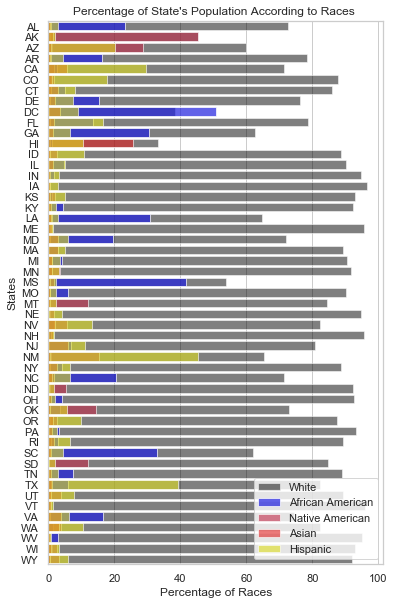

In [402]:
# visualization
sns.set(style="whitegrid")
# sns.set_color_codes("pastel")
f,ax = plt.subplots(figsize = (6,10))
sns.barplot(x=white,y=share_area_list,color='black',alpha = 0.5,label='White' )
sns.barplot(x=black,y=share_area_list,color='blue',alpha = 0.7,label='African American')
sns.barplot(x=native_american,y=share_area_list,color='crimson',alpha = 0.6,label='Native American')
sns.barplot(x=asian,y=share_area_list,color='red',alpha = 0.6,label='Asian')
sns.barplot(x=hispanic,y=share_area_list,color='yellow',alpha = 0.6,label='Hispanic')

ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")


In [268]:
city_csv.head()


,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


## Point plot higschool vs poverty

In [269]:
poverty_csv.head()
income_csv.head()
print(len(income_csv))

29322


In [270]:
poverty_csv['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [365]:
poverty_csv.poverty_rate.replace(['-'],0.0,inplace = True)
poverty_csv.poverty_rate = poverty_csv.poverty_rate.astype(float)
state_list = list(poverty_csv['Geographic Area'].unique())
state_poverty_ratio = []
for each in state_list:
    state_ = poverty_csv[poverty_csv['Geographic Area']==each]
    state_poverty_rate = sum(state_.poverty_rate)/len(state_)
    state_poverty_ratio.append(state_poverty_rate)

    
state_poverty_rate
data = pd.DataFrame({'state_list': state_list,'state_poverty_ratio':state_poverty_ratio})
new_index = (data['state_poverty_ratio'].sort_values(ascending=False)).index.values
poverty_states = data.reindex(new_index)

poverty_states['state_poverty_ratio'] = poverty_states['state_poverty_ratio']/max( poverty_states['state_poverty_ratio'])




In [272]:
highschool_25_csv.percent_completed_hs.replace(['-'],0.0,inplace = True)
highschool_25_csv.percent_completed_hs = highschool_25_csv.percent_completed_hs.astype(float)
state_list = list(highschool_25_csv['Geographic Area'].unique())
state_highschool_ratio = []
for items in state_list:
    state_school = highschool_25_csv[highschool_25_csv['Geographic Area']==items]
    state_highschool_rate = sum(state_school.percent_completed_hs)/len(state_school)
    state_highschool_ratio.append(state_highschool_rate)
# sorting

new_data = pd.DataFrame({'state_list': state_list,'state_highschool_ratio':state_highschool_ratio})
new_index2 = (new_data['state_highschool_ratio'].sort_values(ascending=True)).index.values
highschool_by_state = new_data.reindex(new_index2)

# highschool_25_csv2 = highschool_25_csv.copy()
highschool_by_state['state_highschool_ratio'] = highschool_by_state['state_highschool_ratio']/max( highschool_by_state['state_highschool_ratio'])



In [273]:
income_csv = income_csv.dropna()
income_csv.replace(['-'],0.0,inplace = True)
income_csv.replace(['(X)'],0.0,inplace = True)
income_csv.replace(['2,500-'],0.0,inplace = True)
income_csv.replace(['250,000+'],0.0,inplace = True)
income_csv.loc[:,["Median Income"]] = income_csv.loc[:,["Median Income"]].astype(int)

state_list = list(income_csv['Geographic Area'].unique())
state_income_ratio = []
for states in state_list:
    state_income = income_csv[income_csv['Geographic Area']==states]
    state_income_rate = sum(state_income["Median Income"])/len(state_income)
    state_income_ratio.append(state_income_rate)

income_data = pd.DataFrame({'state_list': state_list,'state_income_ratio':state_income_ratio})
income_index = (income_data['state_income_ratio'].sort_values(ascending=True)).index.values
income_by_state = income_data.reindex(income_index)

# income_csv2 = income_csv.copy()
income_by_state['state_income_ratio'] = income_by_state['state_income_ratio']/max( income_by_state['state_income_ratio'])


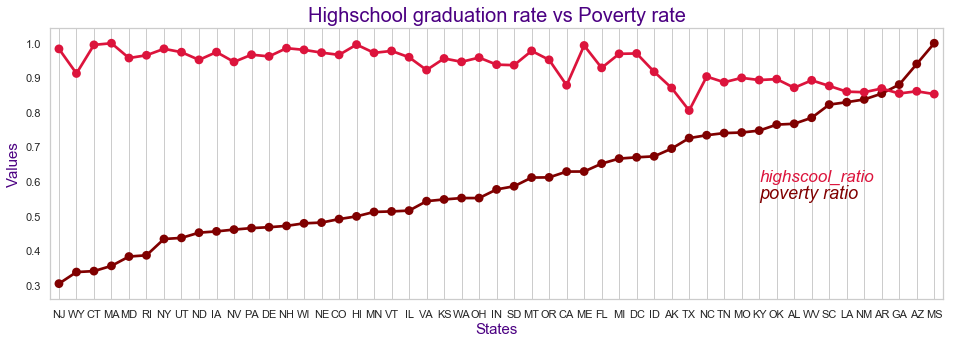

In [274]:
concat_df = pd.concat([highschool_by_state,poverty_states['state_poverty_ratio']],axis=1)
concat_df.sort_values('state_poverty_ratio',inplace=True)

concat_df = concat_df.dropna()
concat_df

sns.set(style="whitegrid")
f,ax1 = plt.subplots(figsize =(16,5))
sns.pointplot(x='state_list',y='state_poverty_ratio',data=concat_df,color='maroon',alpha=0.8)
sns.pointplot(x='state_list',y='state_highschool_ratio',data=concat_df,color='crimson',alpha=0.8)
plt.text(40,0.6,'highscool_ratio',color='crimson',fontsize = 17,style = 'italic')
plt.text(40,0.55,'poverty ratio',color='maroon',fontsize = 18,style = 'italic')
plt.xlabel('States',fontsize = 15,color='indigo')
plt.ylabel('Values',fontsize = 15,color='indigo')
plt.title('Highschool graduation rate vs Poverty rate',fontsize = 20,color='indigo')
plt.grid()
# concat_df["Geographic Area"].dtype

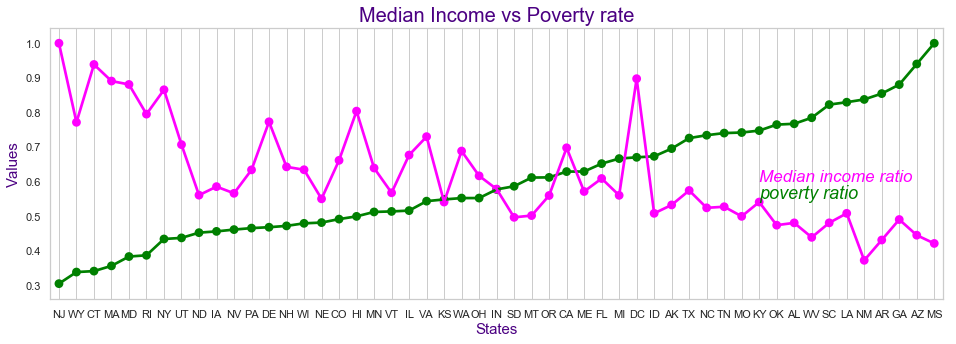

In [275]:
concat_df2 = pd.concat([income_by_state,poverty_states['state_poverty_ratio']],axis=1)
concat_df2.sort_values('state_poverty_ratio',inplace=True)
concat_df2 = concat_df2.dropna()
concat_df2
sns.set(style="whitegrid")
f,ax1 = plt.subplots(figsize =(16,5))
sns.pointplot(x='state_list',y='state_poverty_ratio',data=concat_df2,color='green',alpha=0.8)
sns.pointplot(x='state_list',y='state_income_ratio',data=concat_df2,color='magenta',alpha=0.8)
plt.text(40,0.6,'Median income ratio',color='magenta',fontsize = 17,style = 'italic')
plt.text(40,0.55,'poverty ratio',color='green',fontsize = 18,style = 'italic')
plt.xlabel('States',fontsize = 15,color='indigo')
plt.ylabel('Values',fontsize = 15,color='indigo')
plt.title('Median Income vs Poverty rate',fontsize = 20,color='indigo')
plt.grid()


In [276]:
concat_df = pd.concat([highschool_by_state,poverty_states['state_poverty_ratio']],axis=1)
concat_df.sort_values('state_poverty_ratio',inplace=True)
concat_df = concat_df.dropna()